# Multi-Agent Systems

In [1]:
import os
import sys
import random
import json
from pydantic import BaseModel, Field
from dataclasses import dataclass, field
import plotext
import numpy

from typing import Annotated, Literal, Sequence, Union, List, Dict, Tuple
from typing_extensions import TypedDict

from langchain_core.messages import HumanMessage, SystemMessage, BaseMessage, FunctionMessage, \
                                    AIMessage, ToolCall

from langchain_openai import ChatOpenAI
from langchain_community.tools import TavilySearchResults
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import ToolMessage

from IPython.display import Image, display

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from lib.utils import set_chatgpt_env, set_langsmith_env, set_tavily_env

In [2]:
set_langsmith_env()
set_chatgpt_env()
set_tavily_env()

## Plotting

In [3]:
def generate_bar_graph(data: Dict[str, float], title: str) -> str:
    """
    Generate a bar vertical graph from a dictionary of data.

    Parameters
    ----------
        data (Dict[str, float])
            A dictionary of data to be plotted.Where the keys are the categories and 
            the values are the values for each category.
        title (str)
            The title of the plot.

    Returns
    --------
        str: The plot as a string.
    """

    cats = list(data.keys())
    vals = list(data.values())
    plotext.clear_figure()
    plotext.bar(cats, vals)
    plotext.title(title)
    return plotext.build()

def generate_horizontal_bar_graph(data: Dict[str, float], title: str) -> str:
    """
    Generate a horizontal bar graph from a dictionary of data.

    Parameters
    ----------
        data (Dict[str, float])
            A dictionary of data to be plotted.Where the keys are the categories and 
            the values are the values for each category.
        title (str)
            The title of the plot.

    Returns
    --------
        str: The plot as a string.
    """
    
    cats = list(data.keys())
    vals = list(data.values())
    plotext.clear_figure()
    plotext.bar(cats, vals, orientation="h", width=0.5)
    plotext.title(title)
    return plotext.build()


def generate_line_graph(x: List[float], y: List[float], title: str) -> str:
    """
    Generate a line graph from a list of x and y values.

    Parameters
    ----------
        x (List[float])
            The x axis values for the plot.
        y (List[float])
            The y axis values for the plot.
        title (str)
            The title of the plot.

    Returns
    --------
        str: The plot as a string.
    """

    plotext.clear_figure()
    plotext.plot(x, y)
    plotext.title(title)
    return plotext.build()


def generate_scatter_plot(x: List[float], y: List[float], title: str) -> str:
    """
    Generate a scatter plot from a list of x and y values.

    Parameters
    ----------
        x (List[float])
            The x axis values for the plot.
        y (List[float])
            The y axis values for the plot.
        title (str)
            The title of the plot.

    Returns
    --------
        str: The plot as a string.  
    """

    plotext.clear_figure()
    plotext.scatter(x, y)
    plotext.title(title)
    return plotext.build()


def generate_histogram(data: List[float], title: str, num_bins: int = 10) -> str:
    """
    Generate a histogram from a list of data.

    Parameters
    ----------
        data (List[float])
            The data to be plotted.
        num_bins (int)
            The number of bins for the histogram.
        title (str)
            The title of the plot.

    Returns
    --------
        str: The plot as a string.
    """

    plotext.clear_figure()
    plotext.hist(data, bins=num_bins)
    plotext.title(title)
    return plotext.build()


def generate_multiple_line_graphs(data: Dict[str, Tuple[List[float], List[float]]], title: str) -> str:
    """
    Generate a multiple line graph from a dictionary of data.

    Parameters
    ----------
        data (Dict[str, Tuple[List[float], List[float]]])
            A dictionary of data to be plotted.Where the keys are the categories and 
            the values are a tuple of x axis values and y axis   values.
        title (str)
            The title of the plot.

    Returns
    --------
        str: The plot as a string.
    """

    plotext.clear_figure()
    for key, values in data.items():
        plotext.plot(values[0], values[1], label=key)
    plotext.title(title)
    return plotext.build()

In [4]:
print(generate_bar_graph({"A": 1, "B": 2, "C": 3}, "Bar Chart Example"))

                                  Bar Chart Example                             
    ┌──────────────────────────────────────────────────────────────────────────┐
3.00┤                                                    ██████████████████████│
    │                                                    ██████████████████████│
    │                                                    ██████████████████████│
2.50┤                                                    ██████████████████████│
    │                                                    ██████████████████████│
    │                                                    ██████████████████████│
2.00┤                          ██████████████████████    ██████████████████████│
    │                          ██████████████████████    ██████████████████████│
1.50┤                          ██████████████████████    ██████████████████████│
    │                          ██████████████████████    ██████████████████████│
    │                       

In [5]:
print(generate_line_graph([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], "Line Chart Example"))

                                 Line Chart Example                             
    ┌──────────────────────────────────────────────────────────────────────────┐
5.00┤                                                                       ▗▄▞│
    │                                                                   ▗▄▞▀▘  │
    │                                                               ▗▄▞▀▘      │
4.33┤                                                           ▗▄▞▀▘          │
    │                                                       ▄▄▞▀▘              │
    │                                                  ▗▄▄▀▀                   │
3.67┤                                              ▄▄▞▀▘                       │
    │                                         ▗▄▄▀▀                            │
3.00┤                                     ▄▄▞▀▘                                │
    │                                 ▄▄▀▀                                     │
    │                       

In [6]:
print(generate_scatter_plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], "Scatter Plot Example"))

                                Scatter Plot Example                            
    ┌──────────────────────────────────────────────────────────────────────────┐
5.00┤                                                                         ▝│
    │                                                                          │
    │                                                                          │
4.33┤                                                                          │
    │                                                       ▖                  │
    │                                                                          │
3.67┤                                                                          │
    │                                                                          │
3.00┤                                     ▖                                    │
    │                                                                          │
    │                       

In [7]:
print(generate_histogram(numpy.random.randint(1, 100, 100), "Histogram Example"))

                                  Histogram Example                             
    ┌──────────────────────────────────────────────────────────────────────────┐
16.0┤                                             ███████                      │
    │                                             ███████                      │
    │                                             ███████               ███████│
13.3┤                                             ███████               ███████│
    │███████                                      ███████               ███████│
    │███████                                      ███████               ███████│
10.7┤███████               ███████        ███████ ██████████████        ███████│
    │███████               ███████        ███████ ██████████████        ███████│
 8.0┤██████████████        ███████        ███████ ██████████████ ██████████████│
    │██████████████        ███████        ███████ ██████████████ ██████████████│
    │██████████████ ████████

In [8]:
print(generate_horizontal_bar_graph({"A": 1, "B": 2, "C": 3}, "Horizontal Bar Chart Example"))

                          Horizontal Bar Chart Example                          
 ┌─────────────────────────────────────────────────────────────────────────────┐
 │█████████████████████████████████████████████████████████████████████████████│
 │█████████████████████████████████████████████████████████████████████████████│
C┤█████████████████████████████████████████████████████████████████████████████│
 │█████████████████████████████████████████████████████████████████████████████│
 │                                                                             │
 │                                                                             │
 │                                                                             │
 │████████████████████████████████████████████████████                         │
B┤████████████████████████████████████████████████████                         │
 │████████████████████████████████████████████████████                         │
 │██████████████████████████

In [9]:
data = {"A": ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5]), "B": ([1, 2, 3, 4, 5], [7, 8, 9, 4, 10])}
print(generate_multiple_line_graphs(data, "Multiple Line Chart Example"))

                             Multiple Line Chart Example                        
    ┌──────────────────────────────────────────────────────────────────────────┐
10.0┤ ▞▞ A                                                                    ▞│
    │ ▞▞ B                                                                  ▗▀ │
    │                                ▗▄▄▄▄▚                               ▗▞▘  │
 8.5┤                       ▗▄▄▄▄▀▀▀▀▘     ▀▄                            ▄▘    │
    │              ▄▄▄▄▞▀▀▀▀▘                ▀▄                        ▗▞      │
    │     ▄▄▄▄▞▀▀▀▀                            ▀▄                     ▞▘       │
 7.0┤▀▀▀▀▀                                       ▀▄                 ▗▀         │
    │                                              ▚▖             ▗▞▘          │
 5.5┤                                               ▝▚▖          ▄▘            │
    │                                                 ▝▚▖      ▗▞             ▗│
    │                       

## Utilities

In [10]:
def get_last_message(state) -> BaseMessage:
    """Get the last message from a list of messages."""
    return state["messages"][-1]


def get_messages_by_role(messages: list[BaseMessage], role: Literal["human", "assistant", "system"]) -> list[BaseMessage]:
    """Get messages by role from a list of messages."""
    return [msg for msg in messages if msg.type == role]


def build_llm():
    """Build an LLM with a custom model name."""
    return ChatOpenAI(model="gpt-4o-mini", temperature=0)

# Define the state type
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]


## Search Agent

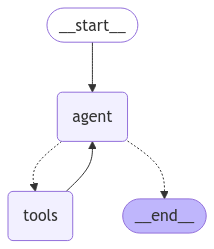

In [11]:
llm = build_llm()

# Initialize tools
tavily_tool = TavilySearchResults()
tools = [tavily_tool]
tool_node = ToolNode(tools)

def call_model(state: AgentState) -> AgentState:
    """Call the model with the current state."""
    messages = state["messages"]
    result = llm.bind_tools(tools).invoke(messages)
    return {"messages": [result]}

def should_continue(state: AgentState):
    messages = state["messages"]
    ai_message = messages[-1]
    
    # Check if it's an AI message with tool calls
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tool"
    return END

# Create the graph
researcher_graph = (
    StateGraph(AgentState)
    .add_node("agent", call_model)
    .add_node("tools", tool_node)
    .add_edge(START, "agent")
    .add_edge("tools", "agent")
    .add_conditional_edges(
        "agent",
        should_continue,
        {
            "tools": "tools",
            END: END,
        }
    )
)

# Compile the graph
researcher_agent = researcher_graph.compile()

display(Image(researcher_agent.get_graph().draw_mermaid_png()))

In [12]:
result = researcher_agent.invoke({
    "messages": [
        HumanMessage(content="Who was Abraham Lincoln?")
    ]
})

print(result['messages'][-1].content)

Abraham Lincoln was the 16th President of the United States, serving from March 1861 until his assassination in April 1865. He is best known for leading the country during the American Civil War and for his efforts to abolish slavery. Lincoln was born on February 12, 1809, in Hardin County, Kentucky, and grew up in Indiana and Illinois.

Before his presidency, Lincoln worked as a lawyer and served in the Illinois State Legislature and the U.S. House of Representatives. He gained national prominence as a member of the Republican Party, which opposed the expansion of slavery into the territories.

Lincoln's presidency was marked by significant events, including the secession of Southern states, the Civil War, and the issuance of the Emancipation Proclamation in 1863, which declared that all slaves in Confederate-held territory were to be set free. He also delivered the famous Gettysburg Address, which emphasized the principles of human equality and the importance of preserving the Union.

## Graph Generation Agent

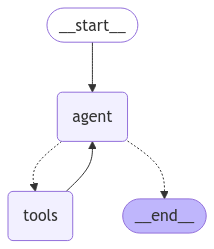

In [13]:
class BarChartInput(BaseModel):
    """Input schema for the bar chart generator."""
    data: Dict[str, float] = Field(..., description="Dictionary where keys are labels and values are numeric values to plot")
    title: str = Field(default="Bar Chart", description="Title of the chart")


@tool(args_schema=BarChartInput)
def generate_bar_chart(data: Dict[str, float], title: str) -> str:
    """Generate a bar chart from data points and display it.
    
    Parameters
    ----------
        data: Dict[str, float]
            Dictionary where keys are labels and values are numeric values to plot
        title: str
            Title of the chart (optional, defaults to "Bar Chart")
        
    Returns:
        plot as string
        
    Example:
        input = BarChartInput(
            data={"A": 10, "B": 20, "C": 15},
            title="Sample Chart"
        )
    """

    print(data, title)

    # Generate the chart
    # cats = list(data.keys())
    # vals = list(data.values())
    # plotext.clear_figure()
    # plotext.bar(cats, vals)
    # plotext.title(title)
    
    # return plotext.build()
    return "Test"


llm = build_llm()
tools = [generate_bar_chart]
llm_with_tools = llm.bind_tools(tools)
tool_node = ToolNode(tools=tools)


def call_model(state: AgentState) -> AgentState:
    """Call the model with the current state."""
    messages = state["messages"]
    result = llm_with_tools.invoke(messages)
    print(result)
    return {"messages": [result]}


def should_continue(state: AgentState):
    messages = state["messages"]
    ai_message = messages[-1]

    # Check if it's an AI message with tool calls
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tool"
    return END


workflow = StateGraph(AgentState)
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)
workflow.add_edge(START, "agent")
workflow.add_edge("tools", "agent")
workflow.add_conditional_edges(
        "agent",
        should_continue,
        {
            "tools": "tools",
            END: END,
        }
    )

bar_chart_agent = workflow.compile()

display(Image(bar_chart_agent.get_graph().draw_mermaid_png()))

In [14]:
result = bar_chart_agent.invoke({
    "messages": [
        SystemMessage(content="You are a chart generator. You may use the generate_bar_chart tool to generate a chart."),
        HumanMessage(content="Make me a chart with the following data: Canada has 200 points, USA has 250 points, Spain was 150 points.")
    ]
})


print(result['messages'][-1].content)

content='' additional_kwargs={'tool_calls': [{'id': 'call_0kKccJcqpGtjgKGWAFIrLdBC', 'function': {'arguments': '{"data":{"Canada":200,"USA":250,"Spain":150},"title":"Points by Country"}', 'name': 'generate_bar_chart'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 194, 'total_tokens': 226, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-ce56be97-2629-4a5c-aede-54df910e9c7f-0' tool_calls=[{'name': 'generate_bar_chart', 'args': {'data': {'Canada': 200, 'USA': 250, 'Spain': 150}, 'title': 'Points by Country'}, 'id': 'call_0kKccJcqpGtjgKGWAFIrLdBC', 'type': 'tool_call'}] usage_metadata={'input_tokens': 194, 'output_tokens': 32, 'tot

KeyError: 'tool'

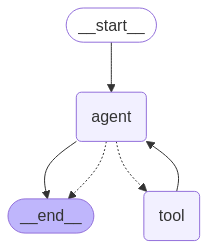

In [15]:
# Define tool schema
class PurchaseTicketInput(BaseModel):
    destination: str = Field(..., description="The destination of the plane ticket.")
    
# Initialize LLM
llm = ChatOpenAI(
    model="gpt-4",
    temperature=0
)

# Create the tool
@tool(args_schema=PurchaseTicketInput)
def purchase_ticket(destination: str) -> str:
    """Buy a plane ticket for a given destination."""
    return f"Purchased ticket to {destination}"

tools = [purchase_ticket]
llm_with_tools = llm.bind_tools(tools)
node_tool = ToolNode(tools=tools)

# Define state type
class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]
    ask_human_use_credit_card: bool

# Define agent node with tools
def node_agent(state: State):
    messages = state["messages"]
    result = llm_with_tools.invoke(messages)  # Simple invoke without tools
    return {"messages": [result]}

def should_continue(state: State):
    messages = state["messages"]
    ai_message = messages[-1]
    
    # Check if it's an AI message with tool calls
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tool"
    return END
    
# Create and configure the graph
workflow = StateGraph(State)
workflow.add_node("agent", node_agent)
workflow.add_node("tool", node_tool)

workflow.add_edge(START, "agent")
workflow.add_edge("tool", "agent")
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "tool": "tool",
        END: END
    }
)

workflow.add_edge("agent", END)

# Initialize memory checkpointer
checkpointer = MemorySaver()

# Compile the graph
graph = workflow.compile(checkpointer=checkpointer)

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
user_input = "I want to go to Tokyo"
def stream_graph_updates(user_input: str):
    input_message = {
        "messages": [
            SystemMessage(content="You are a helpful travel assistant that can book plane tickets."),
            HumanMessage(content=user_input)
        ],
        "ask_human_use_credit_card": False
    }
    
    config = {
        "configurable": {"thread_id": "t1"},
        "checkpoint_ns": "travel_agent",  # Name space for related interactions
        "checkpoint_id": "request"        
    }
    result = graph.invoke(input_message, config)

    # Check state for credit card authorization
    print("\nWAIT: We need human authorization for this operation.")
    user_input = input("Type 'yes' to allow credit card use: ").lower().strip()

    # Update state with user authorization
    current_state = graph.get_state(config)
    new_state = {
        "messages": current_state.values["messages"],
        "ask_human_use_credit_card": user_input == "yes"
    }

    if user_input == "yes":
        final_result = graph.invoke(new_state, config)
        print("\nFinal Result:", final_result["messages"][-1].content)
    else:
        print("\nOperation cancelled: Credit card authorization denied.")
            
while True:
    user_input = input("Enter Travel Plans: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break

    stream_graph_updates(user_input)



WAIT: We need human authorization for this operation.

Final Result: I have successfully booked your plane ticket to Kansas City, MS. Safe travels!

WAIT: We need human authorization for this operation.

Final Result: I have successfully booked your plane ticket to Detroit for this Sunday. Safe travels!
Goodbye!
